# 인천공항 내국인 성별별 출입국자

In [11]:
# 모듈 import
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [12]:
# 윈도우용 폰트 경로 설정(한글 깨짐 방지)
from matplotlib import rc
path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
font_name = fm.FontProperties(fname = path).get_name()
rc("font", family = font_name)

In [13]:
# csv 파일을 불러와 ori 데이터프레임 생성
file_path = "../ref/출입국항구내외국인성별국제이동연간_20250305.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()  # 상위 5개 출력

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [14]:
# team_data에 ori 복사 후 컬럼명 지정
team_data = ori.copy()
team_data.columns = ["airport", "type1", "gender", "year", "type2", "value"]
team_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [17]:
# filter_m에는 내국인 남성, filter_w에는 내국인 여성만 삽입
filter_m = (team_data["type1"]=="내국인")&(team_data["gender"]=="남자")
filter_w = (team_data["type1"]=="내국인")&(team_data["gender"]=="여자")
# team_data[filter_w]   확인용 출력 코드

In [20]:
# filter_m의 기준에 적합한 데이터들을 연도별로 묶고, 해당 연도별 value의 합을 total에 넣어 man_data 데이터프레임 생성
man_data = team_data[filter_m].groupby("year")["value"].sum().reset_index(name="total")
# man_data  확인용 출력코드

In [21]:
# filter_w의 기준에 적합한 데이터들을 연도별로 묶고, 해당 연도별 value의 합을 total에 넣어 woman_data 데이터프레임 생성
woman_data = team_data[filter_w].groupby("year")["value"].sum().reset_index(name="total")
# woman_data  확인용 출력코드

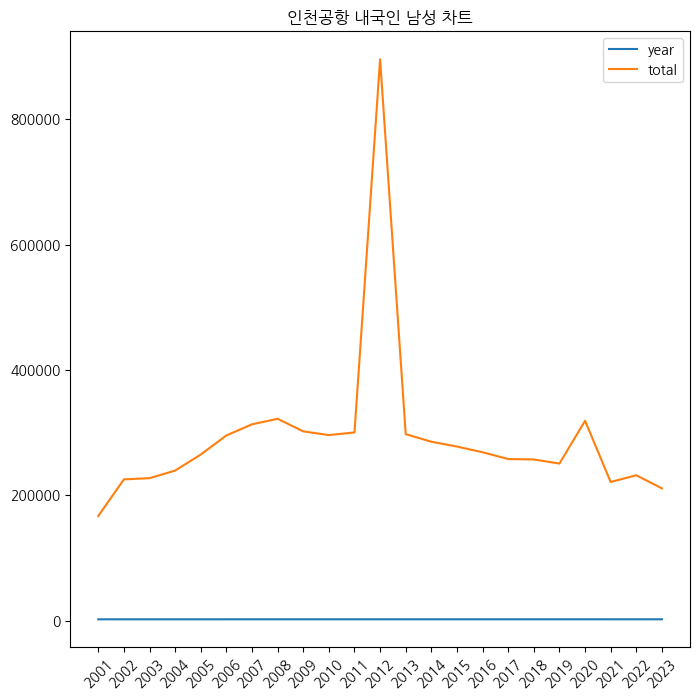

In [22]:
# 그래프 출력 테스트
# man_data를 8*8 사이즈로 제목을 지정하여 ax에 삽입
ax = man_data.plot(figsize=(8,8), title="인천공항 내국인 남성 차트")
ax.set_xticks(range(len(man_data)))  # x축은 man_data 길이만큼
ax.set_xticklabels(man_data["year"], rotation=45)  # man_data의 year로 라벨 지정, 45도 기울임
plt.show()

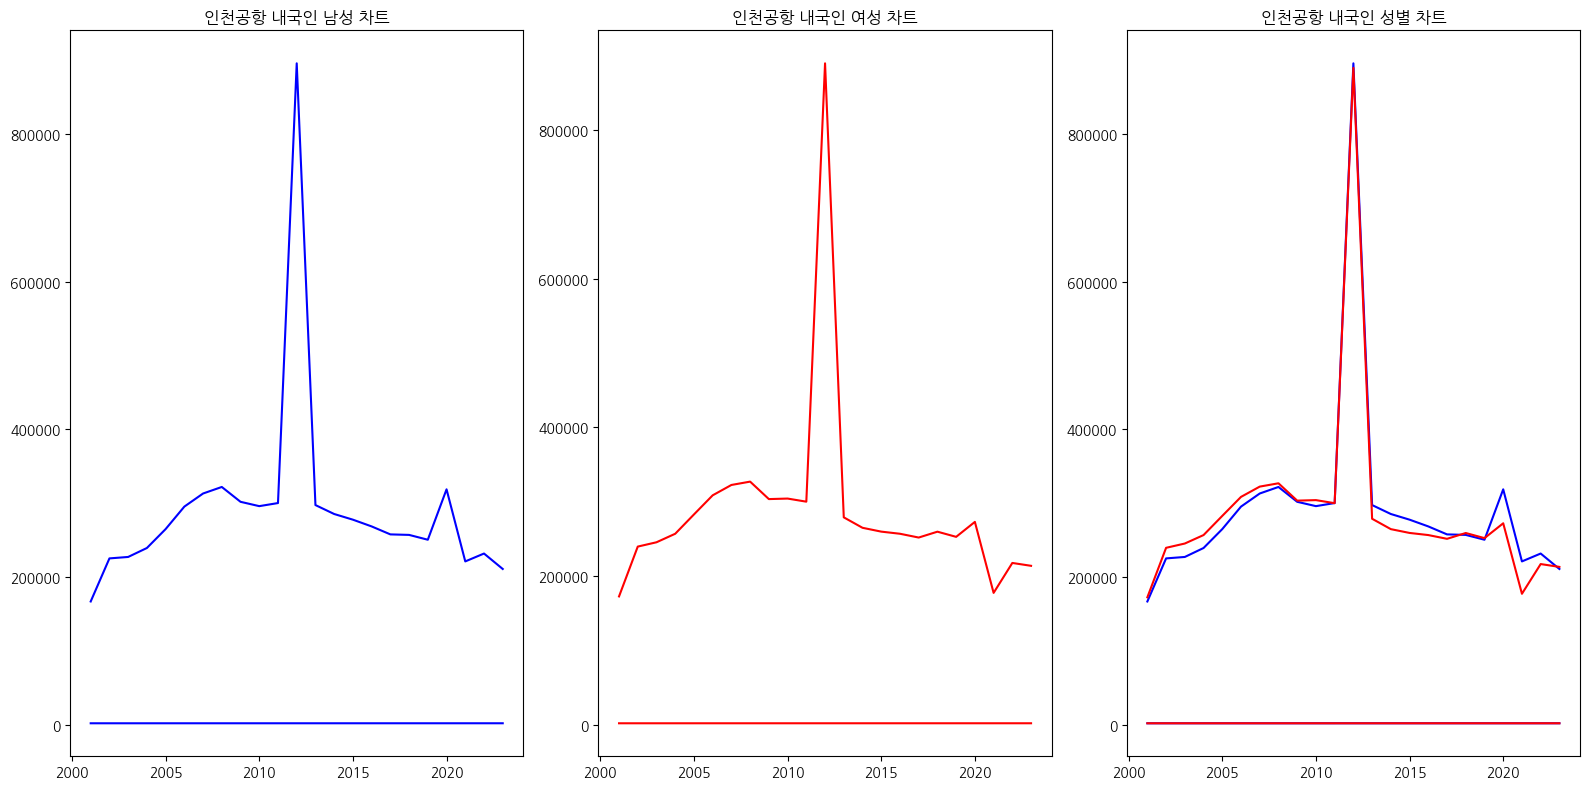

In [24]:
# 그래프 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3,figsize=(16,8))  # 1*3 1차원 서브플롯 생성

axs[0].plot(man_data["year"], man_data, color="b")
axs[1].plot(woman_data["year"], woman_data, color="r")
axs[2].plot(man_data["year"], man_data, color="b")
axs[2].plot(man_data["year"], woman_data, color="r")
axs[0].set_title("인천공항 내국인 남성 차트")
axs[1].set_title("인천공항 내국인 여성 차트")
axs[2].set_title("인천공항 내국인 성별 차트")

# axins = fig.add_axes(axs[1,1])
plt.tight_layout()
plt.show()